<a href="https://colab.research.google.com/github/PaulToronto/Stanford-Andrew-Ng-Machine-Learning-Specialization/blob/main/Logistic_Regression_with_Sympy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic Regression with `sympy`

## Imports

In [1]:
import pandas as pd
import numpy as np

import sympy as sym
from sympy.plotting.plot import MatplotlibBackend, Plot

from sklearn.linear_model import LogisticRegression

from math import ceil

## Toy Datasets

In [2]:
data1 = pd.DataFrame({
        'x': [0, 1, 2, 3, 4, 5],
        'y': [0, 0, 0, 1, 1, 1]
})

data1

,x,y
0,0,0
1,1,0
2,2,0
3,3,1
4,4,1
5,5,1


In [3]:
x_train1 = sym.Matrix(data1.drop('y', axis=1).values)
y_train1 = sym.Matrix(data1['y'].values)

In [4]:
pos1 = np.array(y_train1) == 1
neg1 = np.array(y_train1) == 0

## Functions

### `sympy` backend

In [5]:
def get_sympy_subplots(plot:Plot):
    backend = MatplotlibBackend(plot)

    backend.process_series()
    backend.fig.tight_layout()
    return backend.plt

### Sigmoid Function

In [6]:
def sigmoid(z):
    """
    Compute the sigmoid of z

    Parameters
    ----------
    z : array_like
        A scalar or numpy array of any size.

    Returns
    -------
     g : array_like
         sigmoid(z)
    """
    z = np.clip( z, -500, 500 )           # protect against overflow
    g = 1.0 / (1.0 + sym.exp(-z))

    return g

### Model Prediction

In [7]:
# `X * w` is used instead of `X @ w`
#   so that the function also works
#   for simple linear regression
def f_wb(X, w, b):
    m = X.shape[0]
    pred = X * w + b * sym.ones(m, 1)
    return pred

In [8]:
f_wb(x_train1, 0, 0)

Matrix([
[0],
[0],
[0],
[0],
[0],
[0]])

### Cost Function

In [9]:
def compute_cost(X, y, w, b):
    m = X.shape[0]
    pred = f_wb(X, w, b)
    cost = sum((pred - y).applyfunc(lambda x: x**2)) / (2 * m)
    return cost

In [10]:
compute_cost(x_train1, y_train1, 0, 0)

1/4

### The Gradient

In [11]:
def compute_gradient(X, y, w, b):
    m, n = X.shape

    y_pred = f_wb(X, w, b)
    err = y_pred - y

    dj_dw = (X.T @ err) / m
    dj_db = sum(err) / m

    return dj_db, dj_dw

In [12]:
compute_gradient(x_train1, y_train1, 0, 0)

(-1/2, Matrix([[-2]]))

### Gradient Descent

In [13]:
def gradient_descent(X, y, w, b, f_cost, f_gradient, alpha, num_iters, print_progress=True):
    w = sym.Matrix([w]) # so it works with simple regression

    J_history = []

    for i in range(num_iters):
        dj_db, dj_dw = f_gradient(X, y, w, b)

        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        J_history.append(f_cost(X, y, w, b))

        # print cost
        if print_progress and (i % ceil(num_iters / 10) == 0):
            print(f'Iteration {i:4d}: Cost {J_history[-1]:8.2f}')

    return w, b, J_history

### Run Gradient Descent

In [14]:
def run_gradient_descent(X, y, alpha, iterations, print_progress=True):
    m, n = X.shape
    initial_w = sym.zeros(n)
    initial_b = 0

    w, b, j_hist = gradient_descent(X,
                                    y,
                                    initial_w,
                                    initial_b,
                                    compute_cost,
                                    compute_gradient,
                                    alpha,
                                    iterations,
                                    print_progress)

    return w, b, j_hist

## Example

In [15]:
x_train1

Matrix([
[0],
[1],
[2],
[3],
[4],
[5]])

In [16]:
y_train1

Matrix([
[0],
[0],
[0],
[1],
[1],
[1]])

In [17]:
alpha = 1e-1
iterations = 1000
w_out, b_out, j_hist = run_gradient_descent(x_train1, y_train1, alpha, iterations, print_progress=True)

Iteration    0: Cost     0.03
Iteration  100: Cost     0.03
Iteration  200: Cost     0.03
Iteration  300: Cost     0.03
Iteration  400: Cost     0.03
Iteration  500: Cost     0.03
Iteration  600: Cost     0.03
Iteration  700: Cost     0.03
Iteration  800: Cost     0.03
Iteration  900: Cost     0.03


In [18]:
w_out

Matrix([[0.257142857142852]])

In [19]:
b_out

-0.142857142857124

### Regression Line

In [20]:
x, y, z = sym.symbols('x y z')

regression_line = w_out[0] * x + b_out
sigmoid_function = 1.0 / (1.0 + sym.exp(-z))
sigmoid_function

1.0/(1.0 + exp(-z))

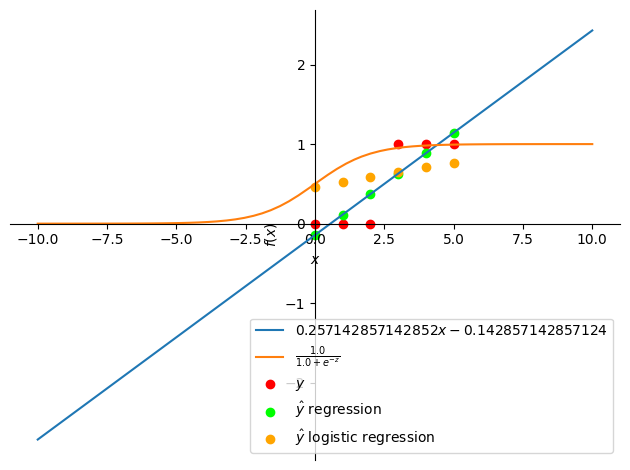

In [21]:
p1 = sym.plot(regression_line, show=False)
p2 = sym.plot(sigmoid_function, show=False)
p1.extend(p2)

plt = get_sympy_subplots(p1)
plt.scatter(x_train1, y_train1, c='red', label='$y$')
plt.scatter(x_train1, f_wb(x_train1, w_out, b_out), c='lime', label='$\hat{y}$ regression')
plt.scatter(x_train1, f_wb(x_train1, w_out, b_out).applyfunc(sigmoid), c='orange', label='$\hat{y}$ logistic regression')
plt.legend()
plt.show()

In [22]:
f_wb(x_train1, w_out, b_out) # .applyfunc(sigmoid)

Matrix([
[-0.142857142857124],
[ 0.114285714285728],
[  0.37142857142858],
[ 0.628571428571432],
[ 0.885714285714283],
[  1.14285714285714]])

In [23]:
for i in range(len(f_wb(x_train1, w_out, b_out))):
    test = sigmoid_function.subs(z, x_train1[i])
    print(test.evalf())

0.500000000000000
0.731058578630005
0.880797077977882
0.952574126822433
0.982013790037908
0.993307149075715


In [24]:
sigmoid(f_wb(x_train1, w_out, b_out)[0])

0.464346329166033

In [25]:
sigmoid(-0.142857142857124)

0.464346329166033

In [26]:
1.0 / (1 + np.exp(0.142857142857124))

0.4643463291660332

In [27]:
sigmoid_function.subs(z, -0.142857142857124)

0.464346329166033

In [28]:
f_wb(x_train1, w_out, b_out).applyfunc(sigmoid)

Matrix([
[0.464346329166033],
[0.528540370982269],
[0.591804126500333],
[ 0.65216546743398],
[0.708004960458542],
[0.758203827592589]])

In [29]:
model = LogisticRegression()
x_train = data1.drop('y', axis=1)
y_train = data1['y']
model.fit(x_train, y_train)

LogisticRegression()

In [38]:
model.coef_, w_out

(array([[1.12061182]]), Matrix([[0.257142857142852]]))

In [39]:
model.intercept_, b_out

(array([-2.80153014]), -0.142857142857124)

In [32]:
model.predict(x_train)

array([0, 0, 0, 1, 1, 1])

In [33]:
model.predict_proba(x_train)

array([[0.94275845, 0.05724155],
       [0.84302609, 0.15697391],
       [0.63652346, 0.36347654],
       [0.36347682, 0.63652318],
       [0.15697407, 0.84302593],
       [0.05724161, 0.94275839]])